# Fraud data

SEOYEON CHOI  
2023-07-10

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

# from ctgan import CTGAN
# from ctgan import load_demo

from sklearn import model_selection # split함수이용
from sklearn import ensemble # RF,GBM
from sklearn import metrics 

In [2]:
def down_sample_textbook(df):
    df_majority = df[df.is_fraud==0].copy()
    df_minority = df[df.is_fraud==1].copy()
    df_maj_dowsampled = sklearn.utils.resample(df_majority, n_samples=len(df_minority), replace=False, random_state=42)
    df_downsampled = pd.concat([df_minority, df_maj_dowsampled])
    return df_downsampled

ref:
https://miruetoto.github.io/yechan3/posts/3_Researches/BORAM/2023-07-03-CTGAN\_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C.html

# Data

In [3]:
fraudTrain = pd.read_csv("fraudTrain.csv").iloc[:,1:]
_df1 = fraudTrain[fraudTrain["is_fraud"] == 0].sample(frac=0.20, random_state=42)
_df2 = fraudTrain[fraudTrain["is_fraud"] == 1]
df02 = pd.concat([_df1,_df2])
df50 = down_sample_textbook(df02)
_df50 = df50.assign(Date=list(map(lambda x: x.split(' ')[0],df50['trans_date_trans_time'])),Time=list(map(lambda x: x.split(' ')[1],df50['trans_date_trans_time'])))

In [4]:
_df50

In [5]:
_df50.columns

In [6]:
df50['is_fraud'].mean()

In [7]:
df50['category'].unique()

In [8]:
_df50_add = _df50.assign(Year = list(map(lambda x: x.split('-')[0],_df50['Date'])),\
                        Mon = list(map(lambda x: x.split('-')[1],_df50['Date'])),\
                        Day = list(map(lambda x: x.split('-')[2],_df50['Date'])),\
                         Hour= list(map(lambda x: x.split(':')[0],_df50['Time'])),\
                         Sec= list(map(lambda x: x.split(':')[1],_df50['Time'])))
_df50_add.Year = _df50_add.Year.astype(np.float64)
_df50_add.Mon = _df50_add.Mon.astype(np.float64)
_df50_add.Day = _df50_add.Day.astype(np.float64)
_df50_add.Hour = _df50_add.Hour.astype(np.float64)
_df50_add.Sec = _df50_add.Sec.astype(np.float64)

In [10]:
_df50_add

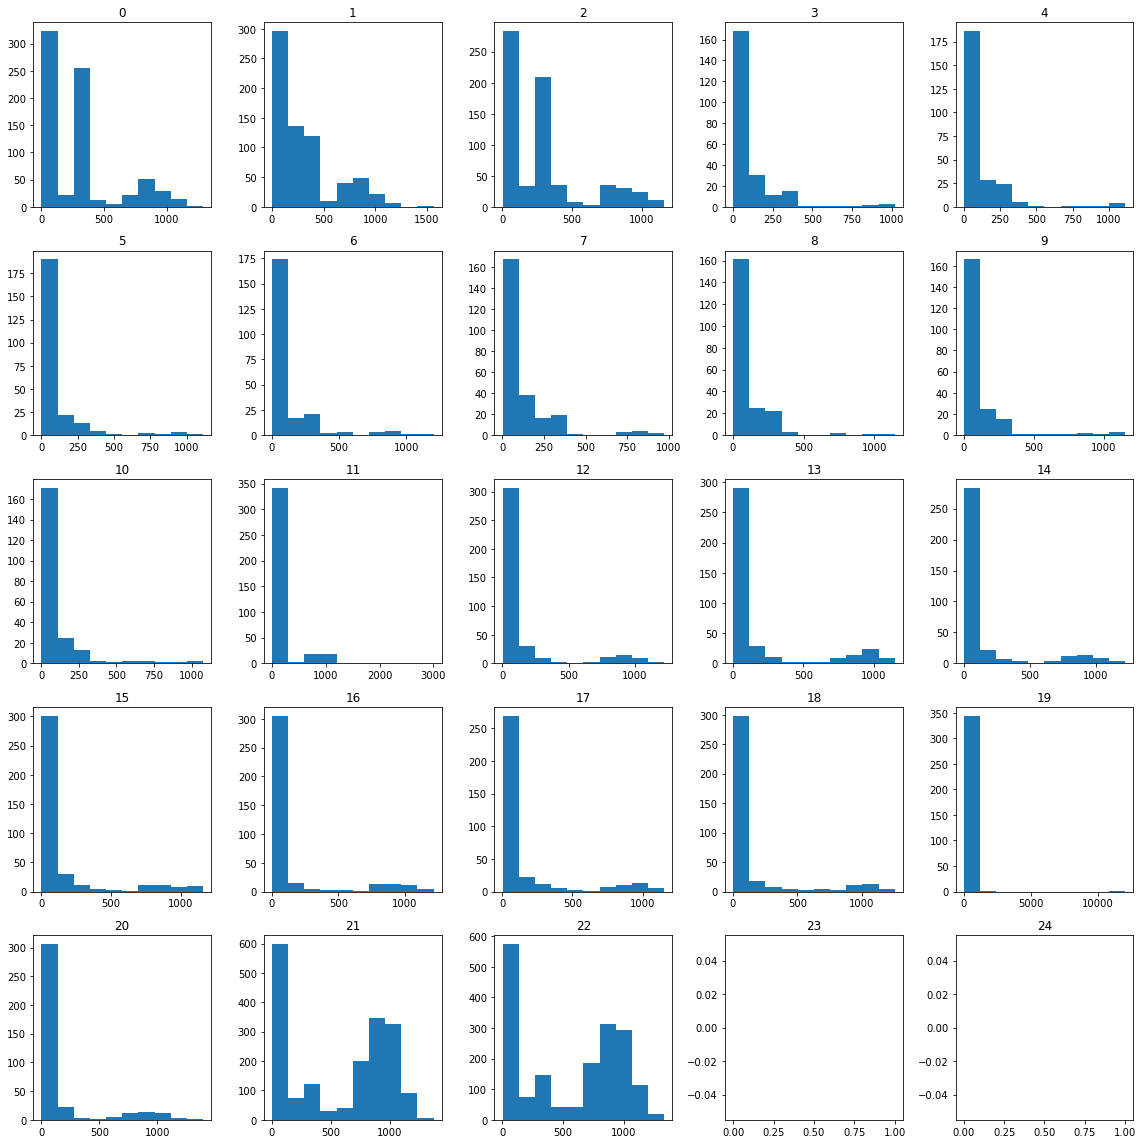

In [12]:
fig,ax =plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5):
        ax[i][j].hist(_df50_add[(_df50_add['Hour'] > k) & (_df50_add['Hour'] <= k+1)]['amt'])
        # ax[i][j].set_xlim([0,15000])
        ax[i][j].set_title(str(k))
        if k < 24:
            k = k + 1
        else:
            pass
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

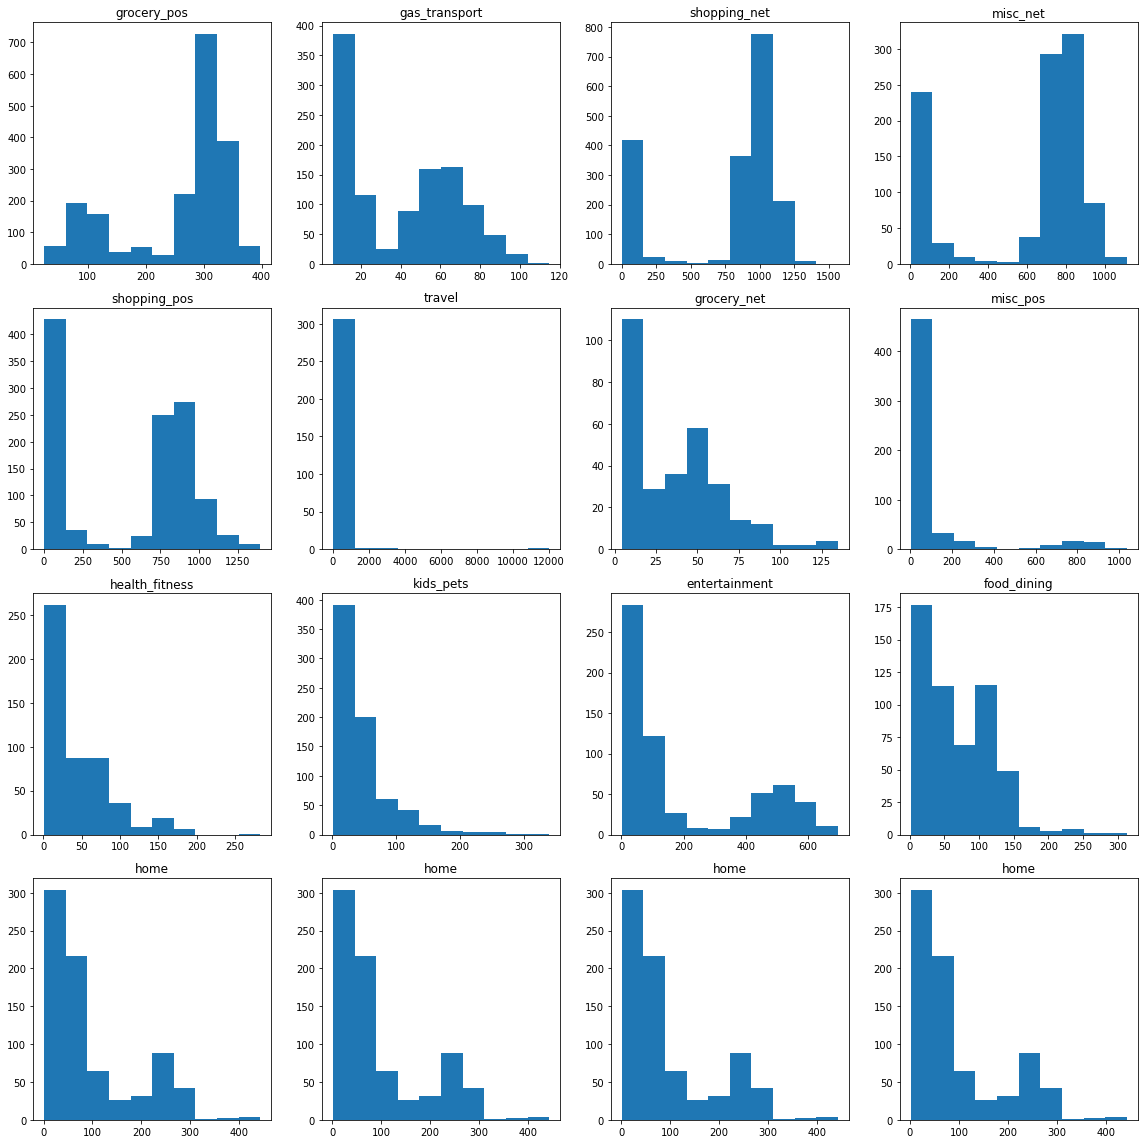

In [13]:
fig,ax =plt.subplots(4,4)
k=0
for i in range(4):
    for j in range(4):
        ax[i][j].hist(df50[df50['category']==df50['category'].unique()[k]]['amt'])
        # ax[i][j].set_ylim([-2,7])
        ax[i][j].set_title(df50['category'].unique()[k])
        if k < 12:
            k = k + 1
        else:
            pass
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()        